In [1]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/AMIT/Downloads/Uber_Trip_Analysis_Dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("\nDataset Preview:")
print(data.head())

# Step 1: Check for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# Step 2: Convert DateTime Columns
print("\nConverting DateTime columns...")
data['Pickup_Time'] = pd.to_datetime(data['Pickup_Time'])
data['Dropoff_Time'] = pd.to_datetime(data['Dropoff_Time'])

# Step 3: Add Trip Duration (in minutes)
data['Trip_Duration'] = (data['Dropoff_Time'] - data['Pickup_Time']).dt.total_seconds() / 60

# Step 4: Remove Invalid Data
# Drop rows where Dropoff_Time is earlier than Pickup_Time
data = data[data['Trip_Duration'] > 0]

# Drop rows with Distance_km or Fare_₹ less than or equal to 0
data = data[(data['Distance_km'] > 0) & (data['Fare_₹'] > 0)]

# Step 5: Remove Duplicates
data = data.drop_duplicates()

# Step 6: Verify Data Cleaning
print("\nData Summary After Cleaning:")
print(data.info())
print("\nBasic Statistics:")
print(data.describe())

# Step 7: Save Cleaned Dataset
cleaned_file_path = "Cleaned_Uber_Trip_Analysis_Dataset.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")



Dataset Preview:
   Trip_ID          Pickup_Time         Dropoff_Time        Pickup_Location  \
0        1  2025-01-25 23:37:08  2025-01-26 00:07:08           Marathahalli   
1        2  2025-01-13 18:01:50  2025-01-13 18:22:50            Koramangala   
2        3  2025-01-09 12:02:20  2025-01-09 12:12:20           Marathahalli   
3        4  2025-01-10 07:58:47  2025-01-10 08:33:47  Whitefield, Bengaluru   
4        5  2025-01-11 15:40:48  2025-01-11 16:11:48                 Hebbal   

        Dropoff_Location  Distance_km  Fare_₹  Customer_Rating  
0  Whitefield, Bengaluru        10.05  194.71              4.7  
1        Electronic City        25.77  549.06              3.3  
2                 Hebbal         9.92  229.69              4.0  
3           Yeshwanthpur        11.20  256.90              4.7  
4            Koramangala         8.29  144.00              4.1  

Missing Values:
Trip_ID             0
Pickup_Time         0
Dropoff_Time        0
Pickup_Location     0
Dropoff_Loca


Dataset Preview:
   Trip_ID          Pickup_Time         Dropoff_Time        Pickup_Location  \
0        1  2025-01-25 23:37:08  2025-01-26 00:07:08           Marathahalli   
1        2  2025-01-13 18:01:50  2025-01-13 18:22:50            Koramangala   
2        3  2025-01-09 12:02:20  2025-01-09 12:12:20           Marathahalli   
3        4  2025-01-10 07:58:47  2025-01-10 08:33:47  Whitefield, Bengaluru   
4        5  2025-01-11 15:40:48  2025-01-11 16:11:48                 Hebbal   

        Dropoff_Location  Distance_km  Fare_₹  Customer_Rating  Trip_Duration  
0  Whitefield, Bengaluru        10.05  194.71              4.7           30.0  
1        Electronic City        25.77  549.06              3.3           21.0  
2                 Hebbal         9.92  229.69              4.0           10.0  
3           Yeshwanthpur        11.20  256.90              4.7           35.0  
4            Koramangala         8.29  144.00              4.1           31.0  


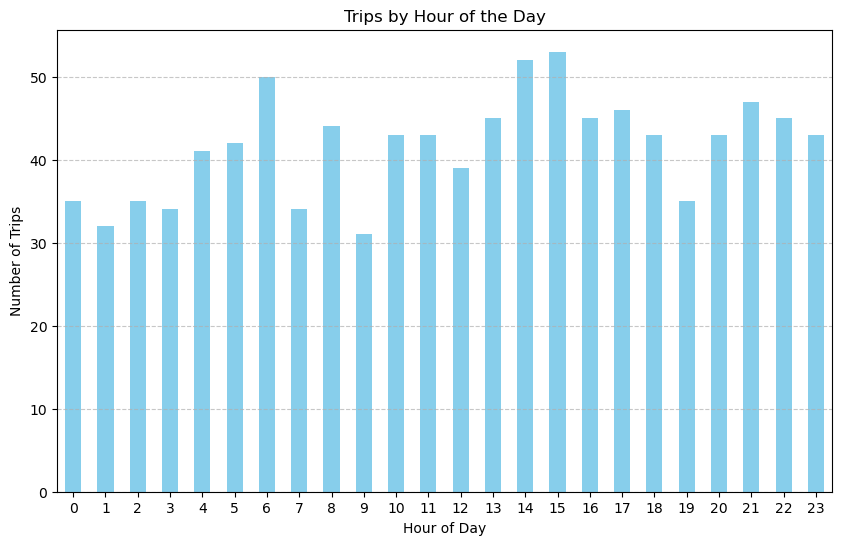

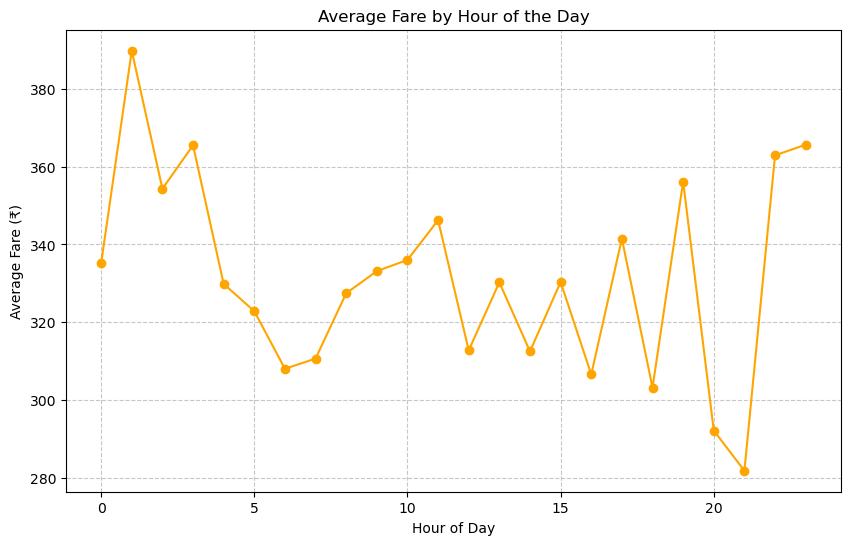

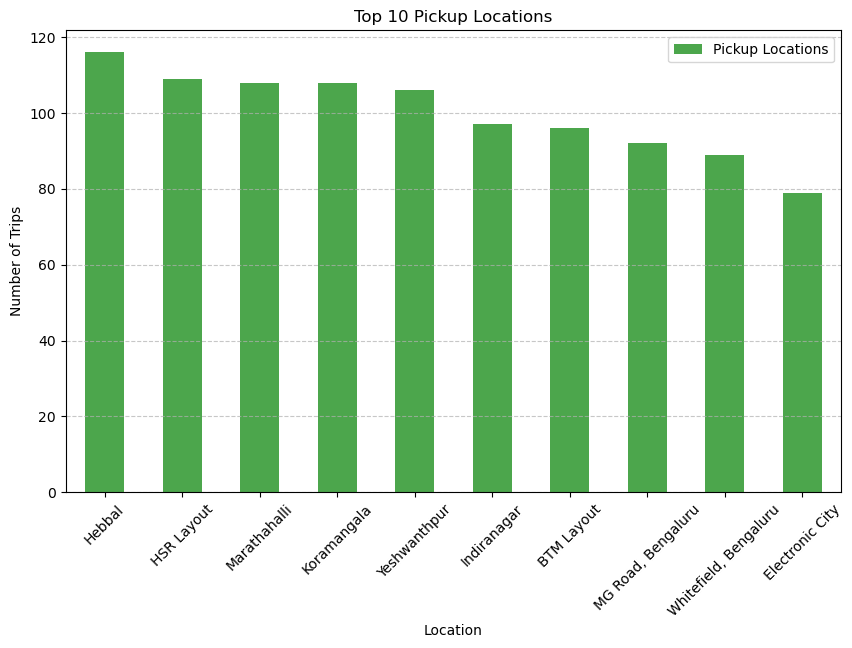

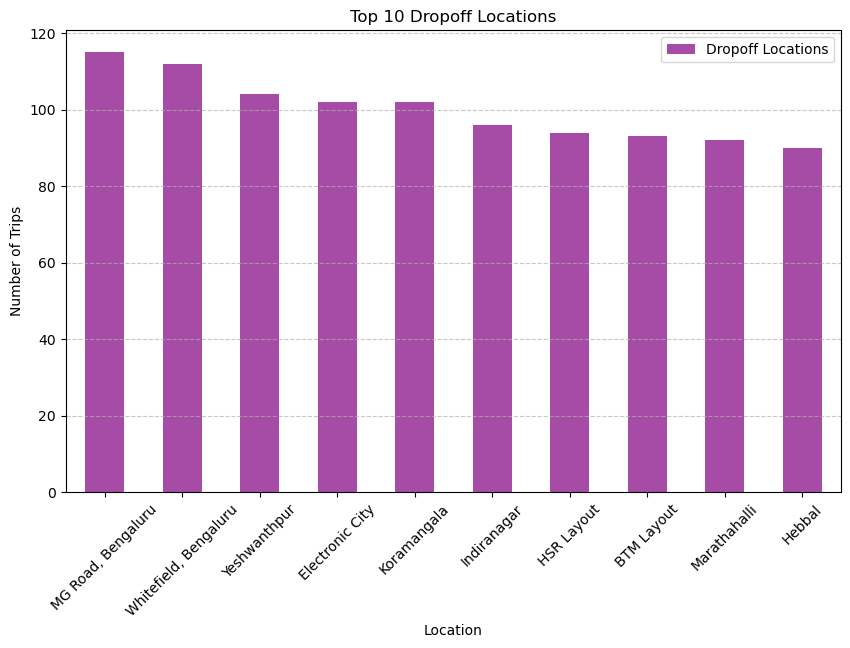

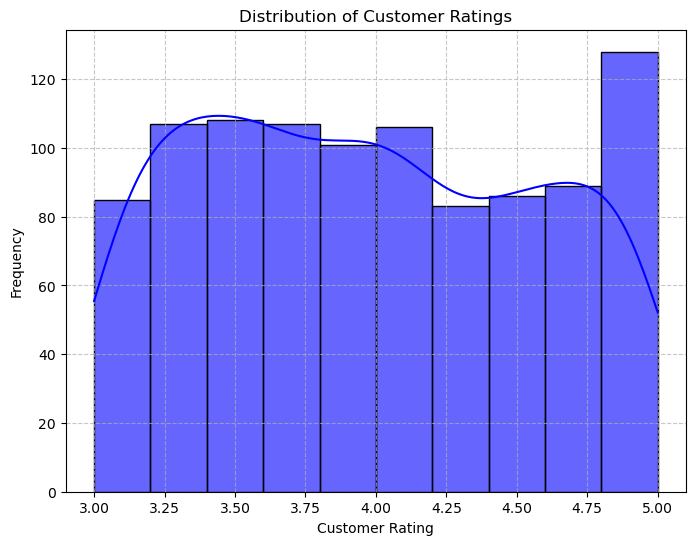

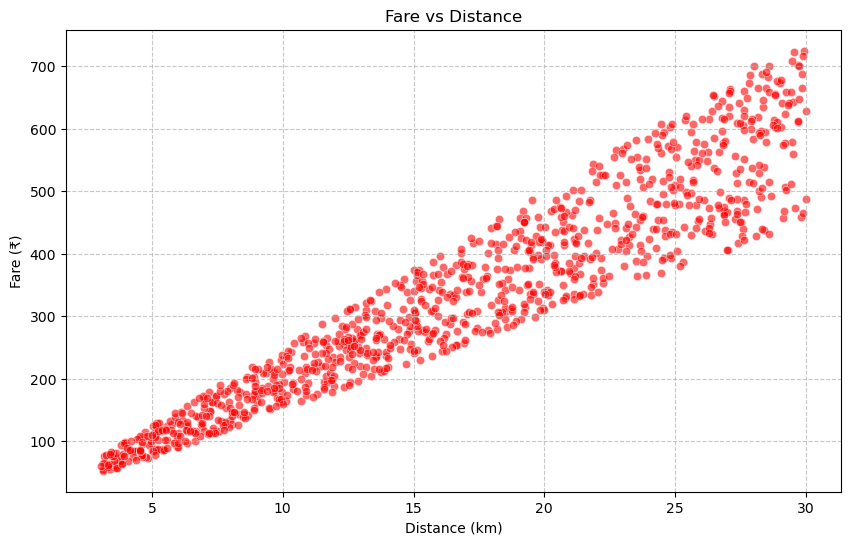

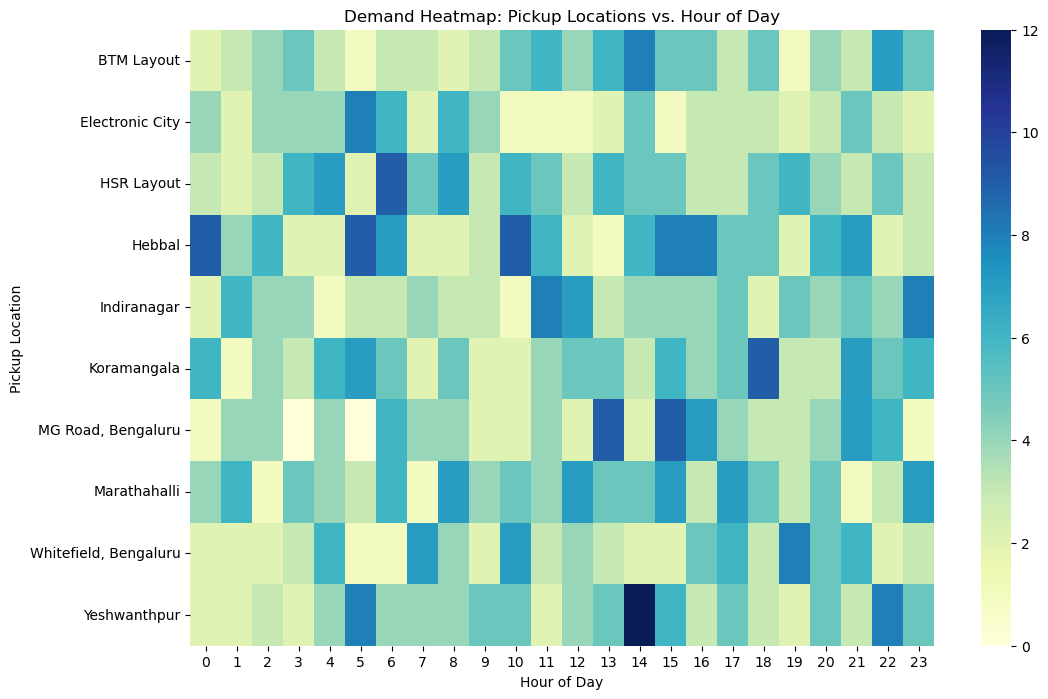

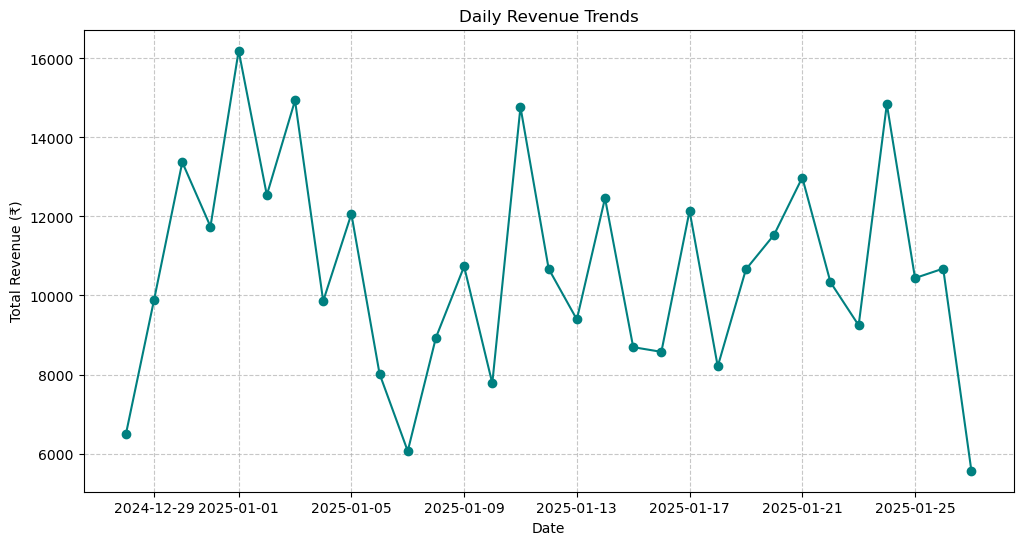


Updated dataset saved to: Updated_Uber_Trip_Analysis_Dataset.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "C:/Users/AMIT/Desktop/Cleaned_Uber_Trip_Analysis_Dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("\nDataset Preview:")
print(data.head())

# Step 1: Demand Analysis
# Plot trip counts by hour of the day
data['Hour'] = pd.to_datetime(data['Pickup_Time']).dt.hour
hourly_demand = data['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_demand.plot(kind='bar', color='skyblue')
plt.title('Trips by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 2: Revenue Analysis
# Calculate average fare by hour
hourly_revenue = data.groupby('Hour')['Fare_₹'].mean()

plt.figure(figsize=(10, 6))
hourly_revenue.plot(kind='line', marker='o', color='orange')
plt.title('Average Fare by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare (₹)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Step 3: Location Analysis
# Most popular pickup and drop-off locations
pickup_locations = data['Pickup_Location'].value_counts().head(10)
dropoff_locations = data['Dropoff_Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
pickup_locations.plot(kind='bar', color='green', alpha=0.7, label='Pickup Locations')
plt.title('Top 10 Pickup Locations')
plt.xlabel('Location')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
dropoff_locations.plot(kind='bar', color='purple', alpha=0.7, label='Dropoff Locations')
plt.title('Top 10 Dropoff Locations')
plt.xlabel('Location')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 4: Customer Rating Analysis
# Distribution of customer ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Customer_Rating'], bins=10, kde=True, color='blue', alpha=0.6)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Step 5: Revenue vs Distance
# Relationship between distance and fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance_km', y='Fare_₹', data=data, alpha=0.6, color='red')
plt.title('Fare vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fare (₹)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Step 6: Peak Demand Heatmap
# Create a crosstab of pickup locations vs. hour of day
demand_heatmap = pd.crosstab(data['Pickup_Location'], data['Hour'])
plt.figure(figsize=(12, 8))
sns.heatmap(demand_heatmap, cmap="YlGnBu", annot=False)
plt.title('Demand Heatmap: Pickup Locations vs. Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Pickup Location')
plt.show()

# Step 7: Revenue Trends Over Time
# Extract date and calculate daily revenue
data['Date'] = pd.to_datetime(data['Pickup_Time']).dt.date
daily_revenue = data.groupby('Date')['Fare_₹'].sum()

plt.figure(figsize=(12, 6))
daily_revenue.plot(kind='line', marker='o', color='teal')
plt.title('Daily Revenue Trends')
plt.xlabel('Date')
plt.ylabel('Total Revenue (₹)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Save Updated Dataset with Additional Columns
data.to_csv("Updated_Uber_Trip_Analysis_Dataset.csv", index=False)
print("\nUpdated dataset saved to: Updated_Uber_Trip_Analysis_Dataset.csv")
